In this example, we will use the multicell module to simulate the self-organization of a geometrical Turing pattern, based on equations developed by Gierer and Meinhardt.

# Preparation

In [1]:
%matplotlib notebook

/home/jl/Library/Python/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Imports

In [2]:
import multicell
import numpy as np

# Problem definition

## Simulation and tissue structure

In [3]:
sim = multicell.simulation_builder.generate_cell_grid_sim(20, 20, 1, 1e-3)

Topomesh importation: started
- setting mesh
- setting pos
- updating properties
Topomesh importation: finished (0.36 s)


## Biological species

In [4]:
sim.register_cell_variable("a")
sim.register_cell_variable("h")

## Computed variables

In [5]:
def c_a2(c_a, **kwargs):
    return c_a**2

sim.register_computed_variable("c_a2", c_a2)

## Constants

In [6]:
sim.set_constants({"mu_a": 1e-1, "mu_h": 2e-1, "rho_a": 1., "rho_h": 1., "q": 1., "H": 0.35, "A": 0., "D_h": 5., "D_a": 0.025})

## Differential equations

In [7]:
def da_dt(simulation, a, c_a, c_a2, c_h, D_a, mu_a, rho_a, A, q, adjacency_matrix, **kwargs):
    return simulation.diffusion(D_a, c_a, adjacency_matrix) + rho_a * c_a2 / c_h / (1 + q**2 * c_a2) - mu_a * a + A


def dh_dt(simulation, h, c_a2, c_h, D_h, mu_h, rho_h, H, adjacency_matrix, **kwargs):
    return simulation.diffusion(D_h, c_h, adjacency_matrix) + rho_h * c_a2 - mu_h * h + H

sim.set_ODE("a", da_dt)
sim.set_ODE("h", dh_dt)

In [8]:
#sim.initialize_concentrations(name="a", _min=0.28, _max=0.31)
#sim.initialize_concentrations(name="h", _min=4.37, _max=4.43)
sim.initialize_cell_variables()

a0 = np.random.uniform(0.28, 0.31, sim.n_cells)
h0 = np.random.uniform(4.37, 4.43, sim.n_cells)

sim.set_cell_variable("a", a0)
sim.set_cell_variable("h", h0)

In [9]:
help(sim.initialize_cell_variables)
help(np.random.uniform)

Help on method initialize_cell_variables in module multicell.simulation:

initialize_cell_variables(self) method of multicell.simulation.Simulation instance
    Creates the time series of cell variables and initializes all values to
    0.

Help on built-in function uniform:

uniform(...)
    uniform(low=0.0, high=1.0, size=1)
    
    Draw samples from a uniform distribution.
    
    Samples are uniformly distributed over the half-open interval
    ``[low, high)`` (includes low, but excludes high).  In other words,
    any value within the given interval is equally likely to be drawn
    by `uniform`.
    
    Parameters
    ----------
    low : float, optional
        Lower boundary of the output interval.  All values generated will be
        greater than or equal to low.  The default value is 0.
    high : float
        Upper boundary of the output interval.  All values generated will be
        less than high.  The default value is 1.0.
    size : int or tuple of ints, optional
 

## Duration

In [10]:
sim.set_duration(1e7)

## Dilution volumes

In [11]:
sim.register_dilution_volume_function(multicell.dilution.constant_volume, {"value": 1.})

## Rendering

In [12]:
sim.register_renderer(multicell.rendering.MatplotlibRenderer, "a")


# Visualization of the initial state

<IPython.core.display.Javascript object>


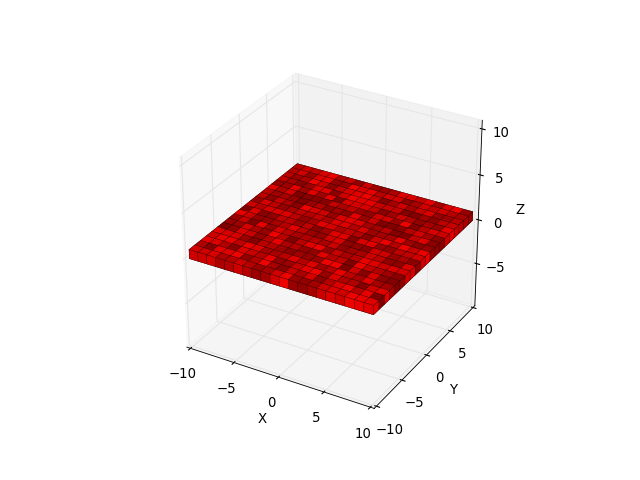

a: from 0.27982982286 to 0.310120312043
h: from 4.36458686117 to 4.43340173046
Max value displayed for a: 0.310120312043


In [13]:
sim.renderer.display("a")

# Simulation

Jacobian computation: started
Jacobian computation: finished (1.41 s)
Integration of the ODE system: 11.1294550896 seconds


<IPython.core.display.Javascript object>


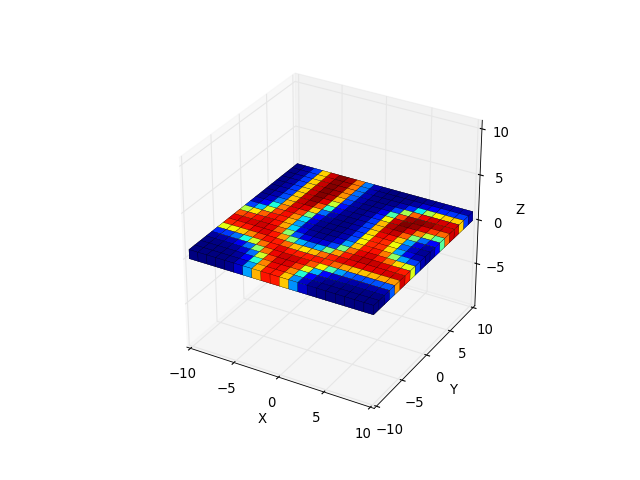

a: from 0.000278583016898 to 1.22554150879
h: from 3.68764274192 to 4.88293200769
Max value displayed for a: 1.22554150879


In [14]:
sim.simulate()